In [1]:
import pandas as pd
import seaborn as sns
from sodapy import Socrata
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [2]:
# initialize SparkSession
sparkSession = SparkSession\
    .builder\
    .getOrCreate()

# Import csv data
dataset = sparkSession\
    .read\
    .options(header='true', inferschema='true')\
    .format("csv")\
    .load("data/2019_Yellow_Taxi_Trip_Data.csv")

KeyboardInterrupt: 

In [44]:
#dataset.show()
dataset.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)



In [56]:
filt = dataset.select("tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_distance", "fare_amount")
filt = filt.filter(dataset.trip_distance != 0.00)
filt.show(10)

+--------------------+---------------------+-------------+-----------+
|tpep_pickup_datetime|tpep_dropoff_datetime|trip_distance|fare_amount|
+--------------------+---------------------+-------------+-----------+
|01/01/2019 12:46:...| 01/01/2019 12:53:...|          1.5|        7.0|
|01/01/2019 12:59:...| 01/01/2019 01:18:...|          2.6|       14.0|
|01/01/2019 12:21:...| 01/01/2019 12:28:...|          1.3|        6.5|
|01/01/2019 12:32:...| 01/01/2019 12:45:...|          3.7|       13.5|
|01/01/2019 12:57:...| 01/01/2019 01:09:...|          2.1|       10.0|
|01/01/2019 12:24:...| 01/01/2019 12:47:...|          2.8|       15.0|
|01/01/2019 12:21:...| 01/01/2019 12:28:...|          0.7|        5.5|
|01/01/2019 12:45:...| 01/01/2019 01:31:...|          8.7|       34.5|
|01/01/2019 12:43:...| 01/01/2019 01:07:...|          6.3|       21.5|
|01/01/2019 12:58:...| 01/01/2019 01:15:...|          2.7|       13.0|
+--------------------+---------------------+-------------+-----------+
only s

In [51]:
print((filt.count(), len(filt.columns)))

(44131885, 4)


In [93]:
dataset_january = filt.where(F.col("tpep_pickup_datetime").between("01/01/2019",  "01/15/2019"))

In [94]:
print((dataset_july.count(), len(dataset_july.columns)))

(3290262, 4)


In [95]:
print(dataset_january)

DataFrame[tpep_pickup_datetime: string, tpep_dropoff_datetime: string, trip_distance: double, fare_amount: double]


In [96]:
pd_dataset = dataset_january.toPandas()

In [ ]:
pd_dataset['tpep_pickup_datetime'] = pd_dataset.['tpep_pickup_datetime'].astype('datetime64[ns]')

In [98]:
pd_dataset.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount
0,01/01/2019 12:46:40 AM,01/01/2019 12:53:20 AM,1.5,7.0
1,01/01/2019 12:59:47 AM,01/01/2019 01:18:59 AM,2.6,14.0
2,01/01/2019 12:21:28 AM,01/01/2019 12:28:37 AM,1.3,6.5
3,01/01/2019 12:32:01 AM,01/01/2019 12:45:39 AM,3.7,13.5
4,01/01/2019 12:57:32 AM,01/01/2019 01:09:32 AM,2.1,10.0


In [107]:
pd_dataset.count()

tpep_pickup_datetime     3290262
tpep_dropoff_datetime    3290262
trip_distance            3290262
fare_amount              3290262
dtype: int64

MemoryError: Unable to allocate array with shape (3311869150554,) and data type bool

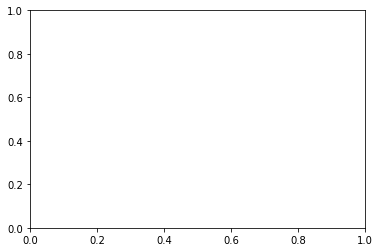

In [105]:
sns.tsplot(data=pd_dataset, time="tpep_pickup_datetime")